In [23]:
import json, os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")

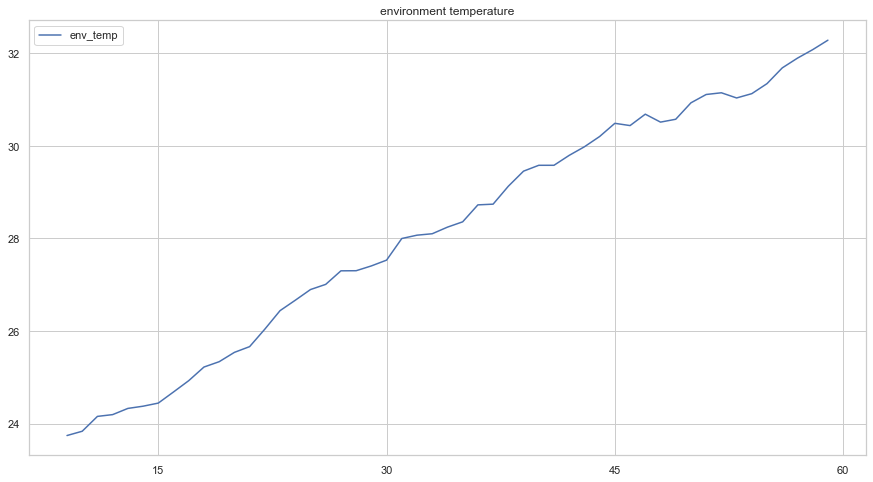

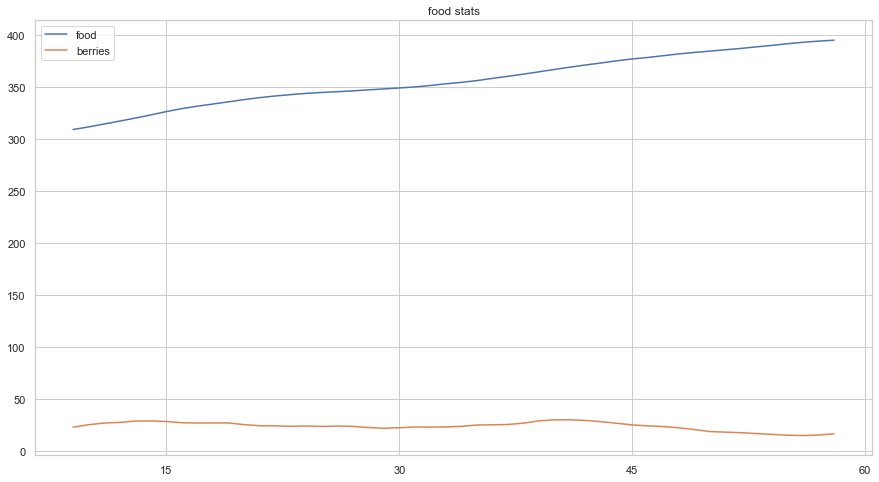

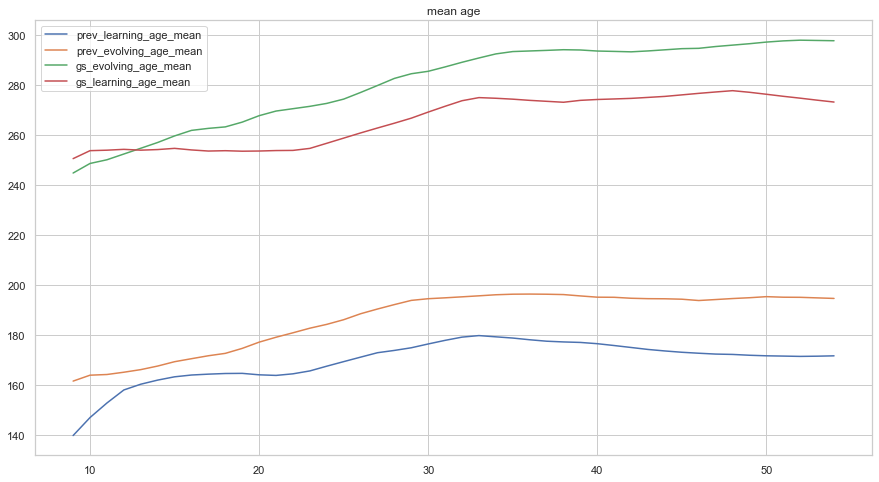

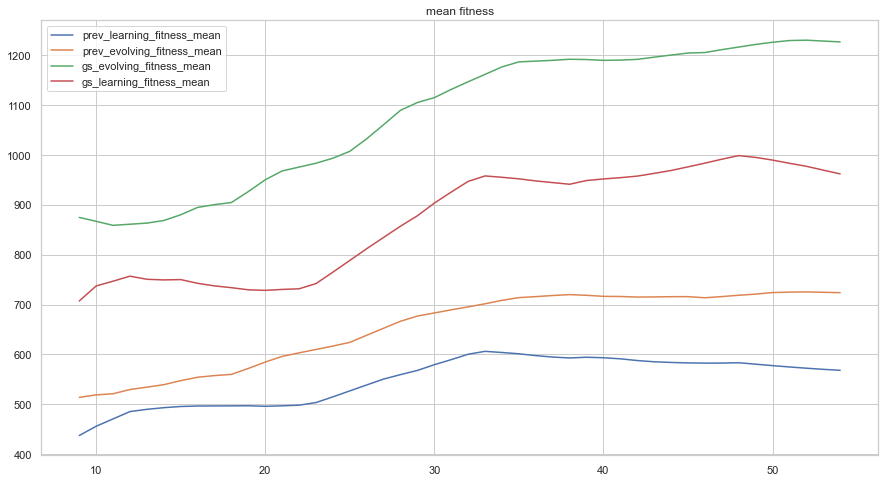

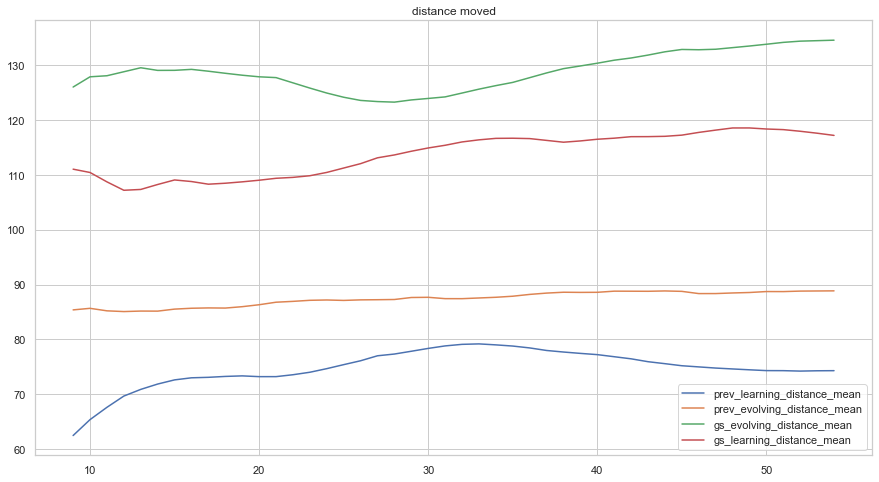

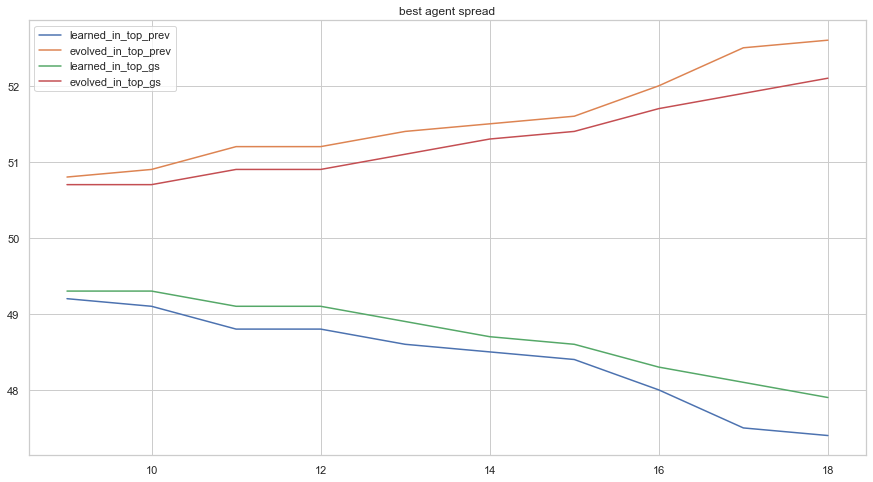

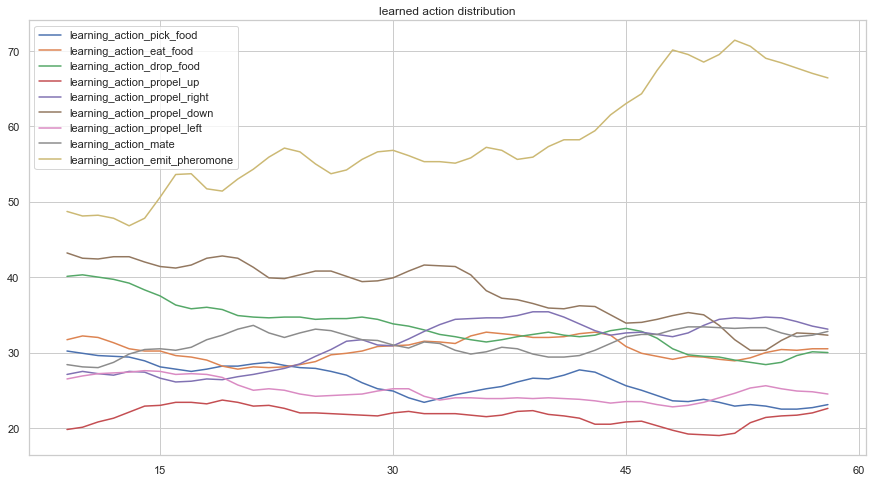

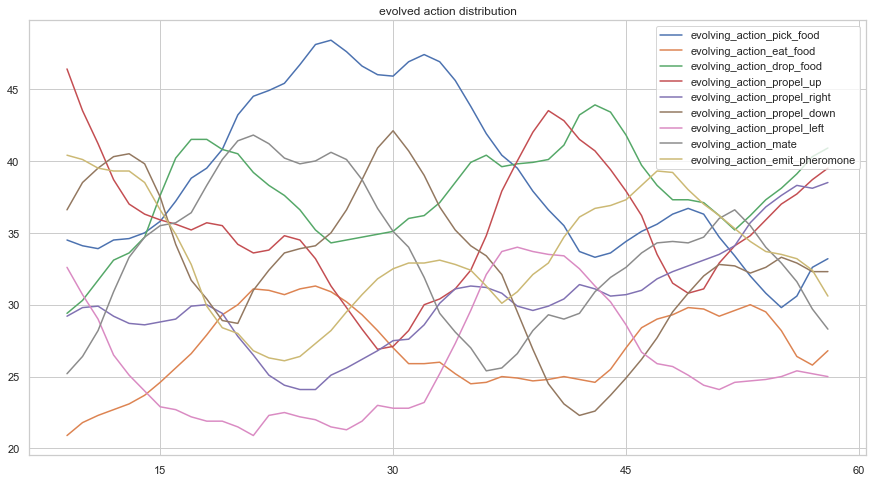

In [24]:
stats = {}
with open("alien_ecology_stats/stats.json", "r") as f:
    stats = json.loads(f.read())

am = [x for x in stats.keys() if "age_mean" in x]
fm = [x for x in stats.keys() if "fitness_mean" in x]
dm = [x for x in stats.keys() if "distance_mean" in x]
tgs = [x for x in stats.keys() if "in_top_" in x]
lad = [x for x in stats.keys() if "learning_action" in x]
ead = [x for x in stats.keys() if "evolving_action" in x]

show = {'environment temperature':
        ['env_temp'],
        'food stats':
        ['food', 'berries'],
        'mean age': am,
        'mean fitness': fm,
        'distance moved': dm,
        'best agent spread': tgs,
        'learned action distribution': lad,
         'evolved action distribution': ead}

for title, group in show.items():
    if len(group) < 1:
        continue
    min_p = min(len(stats[l]) for l in group)
    plot_data = {}
    for label in group:
        plot_data[label] = stats[label][-min_p:]
    data = pd.DataFrame(plot_data)
    fig = plt.figure(figsize=(15,8))
    data = data.rolling(10).mean()
    ax = sns.lineplot(data=data, hue="event", style="event", dashes=False, markers=False, linewidth=1.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_title(title)
    plt.show()